In [2]:
pip install torch

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/5a/6a/775b93d6888c31f1f1fc457e4f5cc89f0984412d5dcdef792b8f2aa6e812/torch-2.4.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for filelock from https://files.pythonhosted.org/packages/b9/f8/feced7779d755758a52d1f6635d990b8d98dc0a29fa568bbe0625f18fdf3/filelock-3.16.1-py3-none-any.whl.metadata
  Obtaining dependency information for fsspec from https://files.pythonhosted.org/packages/1d/a0/6aaea0c2fbea2f89bfd5db25fb1e3481896a423002ebe4e55288907a97a3/fsspec-2024.9.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/199.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/199.4 MB 660.6 kB/s eta 0:05:02
   ---------------------------------------- 0.1/199.4 MB 656.4 kB/s eta 0:05:04
   ---------------------------------------- 0.1/199.4 MB 751.6 kB/s eta 0:04:26
   ---------------------------------------- 0.1/199.4 MB 853.3 kB/s eta 0:03:54
   


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install torchvision


  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/f8/69/dc769cf54df8e828c0b8957b4521f35178f5bd4cc5b8fbe8a37ffd89a27c/torchvision-0.19.1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.3 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.3 MB 871.5 kB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.3 MB 787.7 kB/s eta 0:00:02
   --


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
pip install einops


  Obtaining dependency information for einops from https://files.pythonhosted.org/packages/44/5a/f0b9ad6c0a9017e62d4735daaeb11ba3b6c009d69a26141b258cd37b5588/einops-0.8.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/43.2 kB ? eta -:--:--
   ------------------------------------- -- 41.0/43.2 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 43.2/43.2 kB 701.8 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install scikit-image


  Obtaining dependency information for scikit-image from https://files.pythonhosted.org/packages/50/b2/d5e97115733e2dc657e99868ae0237705b79d0c81f6ced21b8f0799a30d1/scikit_image-0.24.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for imageio>=2.33 from https://files.pythonhosted.org/packages/1e/b7/02adac4e42a691008b5cfb31db98c190e1fc348d1521b9be4429f9454ed1/imageio-2.35.1-py3-none-any.whl.metadata
  Obtaining dependency information for tifffile>=2022.8.12 from https://files.pythonhosted.org/packages/3a/4f/73714b1c1d339b1545cac28764e39f88c69468b5e10e51f327f9aa9d55b9/tifffile-2024.8.30-py3-none-any.whl.metadata
  Obtaining dependency information for lazy-loader>=0.4 from https://files.pythonhosted.org/packages/83/60/d497a310bde3f01cb805196ac61b7ad6dc5dcf8dce66634dc34364b20b4f/lazy_loader-0.4-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/12.8 MB 1.3 MB/s eta 0:00:10
  


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import numpy as np
import pandas as pd
from sklearn import preprocessing
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio
import torch.nn as nn
import torch.nn.functional as F

# Remove all the warnings
import warnings
warnings.filterwarnings('ignore')

# Set env CUDA_LAUNCH_BLOCKING=1
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Retina display
%config InlineBackend.figure_format = 'retina'

try:
    from einops import rearrange
except ImportError:
    %pip install einops
    from einops import rearrange

In [8]:
img = torchvision.io.read_image("dog.jpg")
print(img.shape)

torch.Size([3, 980, 1470])


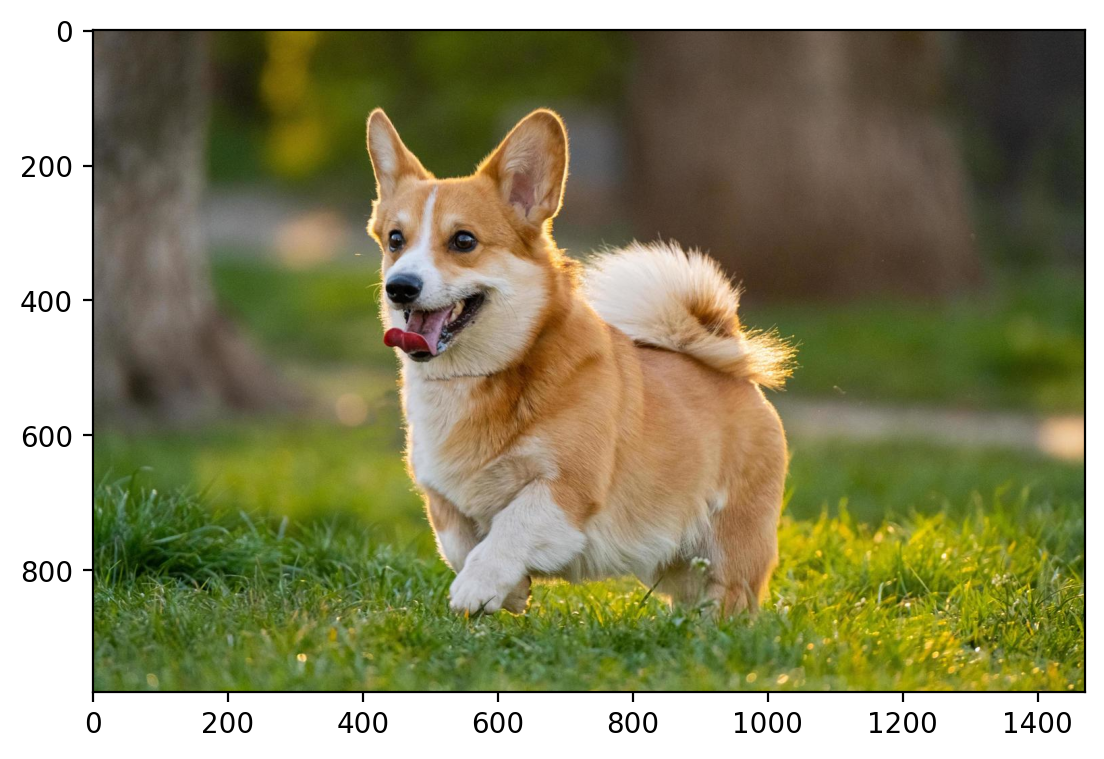

In [9]:
plt.imshow(rearrange(img, 'c h w -> h w c').numpy())

In [10]:
from sklearn import preprocessing

scaler_img = preprocessing.MinMaxScaler().fit(img.reshape(-1, 1))
scaler_img

MinMaxScaler()

In [11]:
img_scaled = scaler_img.transform(img.reshape(-1, 1)).reshape(img.shape)
img_scaled.shape

img_scaled = torch.tensor(img_scaled)

In [12]:
img_scaled = img_scaled.to(device)
img_scaled

tensor([[[0.3725, 0.3608, 0.3529,  ..., 0.1882, 0.1843, 0.1804],
         [0.3569, 0.3490, 0.3451,  ..., 0.1725, 0.1804, 0.1882],
         [0.3529, 0.3490, 0.3451,  ..., 0.1804, 0.1961, 0.2078],
         ...,
         [0.2392, 0.2431, 0.2392,  ..., 0.4784, 0.4627, 0.4431],
         [0.2353, 0.2353, 0.2353,  ..., 0.4588, 0.4549, 0.4471],
         [0.2275, 0.2314, 0.2314,  ..., 0.4392, 0.4471, 0.4510]],

        [[0.3412, 0.3294, 0.3216,  ..., 0.1882, 0.1843, 0.1804],
         [0.3255, 0.3176, 0.3137,  ..., 0.1725, 0.1804, 0.1882],
         [0.3216, 0.3176, 0.3137,  ..., 0.1804, 0.1961, 0.2078],
         ...,
         [0.4000, 0.4039, 0.4039,  ..., 0.5216, 0.4980, 0.4784],
         [0.3961, 0.3961, 0.4000,  ..., 0.5020, 0.4902, 0.4824],
         [0.3882, 0.3922, 0.3961,  ..., 0.4824, 0.4824, 0.4863]],

        [[0.2980, 0.2863, 0.2784,  ..., 0.1804, 0.1765, 0.1725],
         [0.2824, 0.2745, 0.2706,  ..., 0.1647, 0.1725, 0.1804],
         [0.2784, 0.2745, 0.2706,  ..., 0.1725, 0.1882, 0.

In [13]:
crop = torchvision.transforms.functional.crop(img_scaled.cpu(), 200, 400, 300, 300)
crop.shape

torch.Size([3, 300, 300])

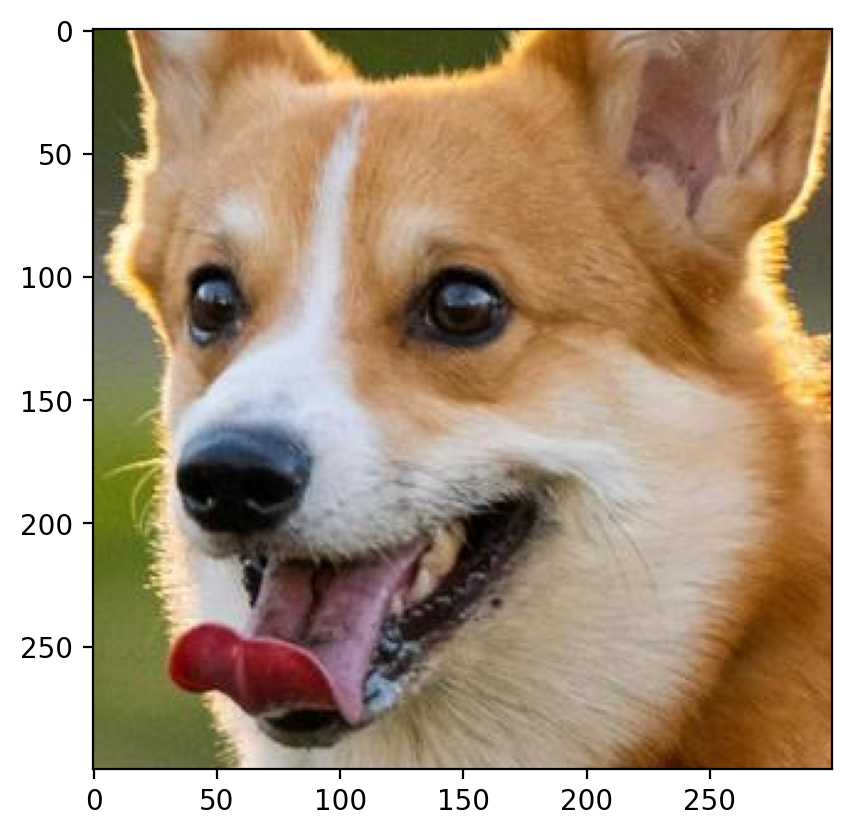

In [14]:
plt.imshow(rearrange(crop, 'c h w -> h w c').cpu().numpy())

In [15]:
crop = crop.to(device)

In [16]:
def create_coordinate_map(img):
    """
    img: torch.Tensor of shape (num_channels, height, width)
    
    return: tuple of torch.Tensor of shape (height * width, 2) and torch.Tensor of shape (height * width, num_channels)
    """
    
    num_channels, height, width = img.shape
    
    # Create a 2D grid of (x,y) coordinates (h, w)
    # width values change faster than height values
    w_coords = torch.arange(width).repeat(height, 1)
    h_coords = torch.arange(height).repeat(width, 1).t()
    w_coords = w_coords.reshape(-1)
    h_coords = h_coords.reshape(-1)

    # Combine the x and y coordinates into a single tensor
    X = torch.stack([h_coords, w_coords], dim=1).float()

    # Move X to GPU if available
    X = X.to(device)

    # Reshape the image to (h * w, num_channels)
    Y = rearrange(img, 'c h w -> (h w) c').float()
    return X, Y

In [17]:
dog_X, dog_Y = create_coordinate_map(crop)

dog_X.shape, dog_Y.shape

(torch.Size([90000, 2]), torch.Size([90000, 3]))

In [19]:
# MinMaxScaler from -1 to 1
scaler_X = preprocessing.MinMaxScaler(feature_range=(-1, 1)).fit(dog_X.cpu())

# Scale the X coordinates
dog_X_scaled = scaler_X.transform(dog_X.cpu())

# Move the scaled X coordinates to the GPU
dog_X_scaled = torch.tensor(dog_X_scaled).to(device)

# Set to dtype float32
dog_X_scaled = dog_X_scaled.float()
dog_X_scaled

tensor([[-1.0000, -1.0000],
        [-1.0000, -0.9933],
        [-1.0000, -0.9866],
        ...,
        [ 1.0000,  0.9866],
        [ 1.0000,  0.9933],
        [ 1.0000,  1.0000]])

**Linear Model**

In [20]:
class LinearModel(nn.Module):
    def __init__(self, in_features, out_features):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self, x):
        return self.linear(x)

In [21]:
net = LinearModel(2, 3)
net.to(device)

LinearModel(
  (linear): Linear(in_features=2, out_features=3, bias=True)
)

**Train Function**

In [22]:
def train(net, lr, X, Y, epochs, verbose=True):
    """
    net: torch.nn.Module
    lr: float
    X: torch.Tensor of shape (num_samples, 2)
    Y: torch.Tensor of shape (num_samples, 3)
    """

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=lr)
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = net(X)
        
        
        loss = criterion(outputs, Y)
        loss.backward()
        optimizer.step()
        if verbose and epoch % 100 == 0:
            print(f"Epoch {epoch} loss: {loss.item():.6f}")
    return loss.item()

In [23]:
train(net, 0.01, dog_X_scaled, dog_Y, 1000)

Epoch 0 loss: 0.293204
Epoch 100 loss: 0.042679
Epoch 200 loss: 0.041534
Epoch 300 loss: 0.041534
Epoch 400 loss: 0.041534
Epoch 500 loss: 0.041534
Epoch 600 loss: 0.041534
Epoch 700 loss: 0.041534
Epoch 800 loss: 0.041534
Epoch 900 loss: 0.041534


0.0415341891348362

**Predict and Plot function**

In [24]:
def plot_reconstructed_and_original_image(original_img, net, X, title=""):
    """
    net: torch.nn.Module
    X: torch.Tensor of shape (num_samples, 2)
    Y: torch.Tensor of shape (num_samples, 3)
    """
    num_channels, height, width = original_img.shape
    net.eval()
    with torch.no_grad():
        outputs = net(X)
        outputs = outputs.reshape(height, width, num_channels)
        #outputs = outputs.permute(1, 2, 0)
    fig = plt.figure(figsize=(6, 4))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

    ax0 = plt.subplot(gs[0])
    ax1 = plt.subplot(gs[1])

    ax0.imshow(outputs.cpu())
    ax0.set_title("Reconstructed Image")
    

    ax1.imshow(original_img.cpu().permute(1, 2, 0))
    ax1.set_title("Original Image")
    
    for a in [ax0, ax1]:
        a.axis("off")


    fig.suptitle(title, y=0.9)
    plt.tight_layout()
    return outputs.cpu()

**Training**

In [25]:
# create RFF features
def create_rff_features(X, num_features, sigma):
    from sklearn.kernel_approximation import RBFSampler
    rff = RBFSampler(n_components=num_features, gamma=1/(2 * sigma**2), random_state = 100)
    X = X.cpu().numpy()
    X = rff.fit_transform(X)
    return torch.tensor(X, dtype=torch.float32).to(device)

In [26]:
X_rff = create_rff_features(dog_X_scaled, 8000, 0.008)

In [27]:
X_rff.shape

torch.Size([90000, 8000])

In [28]:
net = LinearModel(X_rff.shape[1], 3)
net.to(device)

train(net, 0.008, X_rff, dog_Y, 1000)

Epoch 0 loss: 0.304834
Epoch 100 loss: 0.025396
Epoch 200 loss: 0.018438
Epoch 300 loss: 0.015593
Epoch 400 loss: 0.013972
Epoch 500 loss: 0.012956
Epoch 600 loss: 0.012260
Epoch 700 loss: 0.011743
Epoch 800 loss: 0.011333
Epoch 900 loss: 0.010995


0.010709105990827084

**Predicting**

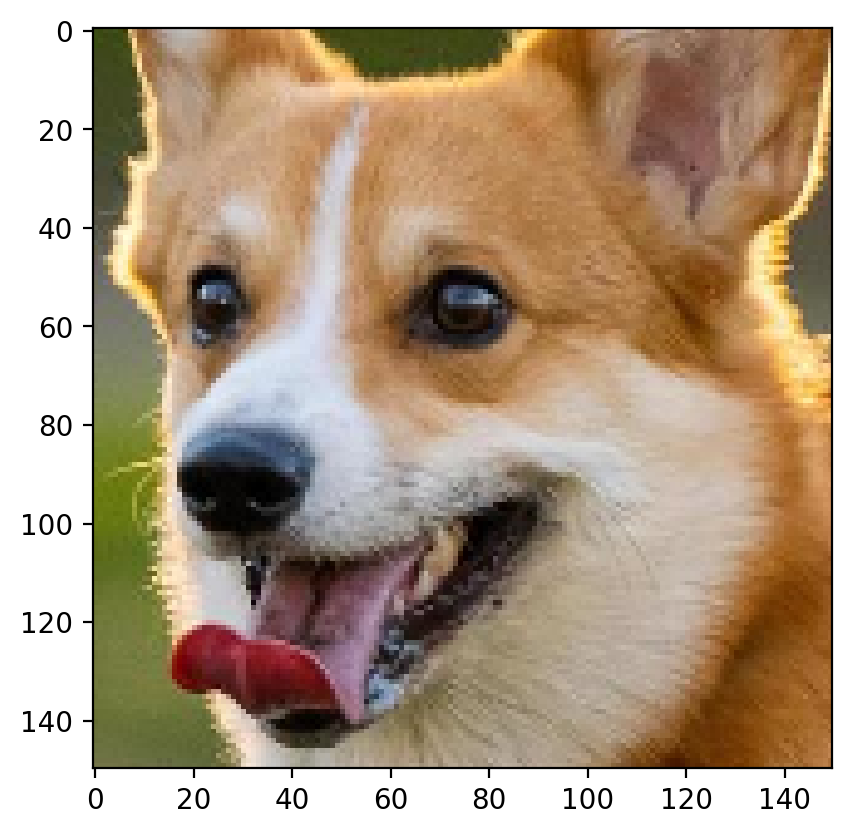

In [29]:
Y = rearrange(crop, 'c h w -> h w c').float()
input_img = Y[::2, ::2, :]
plt.imshow(input_img.cpu())

In [32]:
X_new, y_new = create_coordinate_map(crop)
X_new.size(), y_new.size()

(torch.Size([90000, 2]), torch.Size([90000, 3]))

In [33]:
# MinMaxScaler from -1 to 1
scaler_X = preprocessing.MinMaxScaler(feature_range=(-1, 1)).fit(X_new.cpu())

# Scale the X coordinates
X_new_scaled = scaler_X.transform(X_new.cpu())

# Move the scaled X coordinates to the GPU
X_new_scaled = torch.tensor(X_new_scaled).to(device)

# Set to dtype float32
X_new_scaled = X_new_scaled.float()

In [34]:
X_new_rff = create_rff_features(X_new_scaled, 8000, 0.008)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


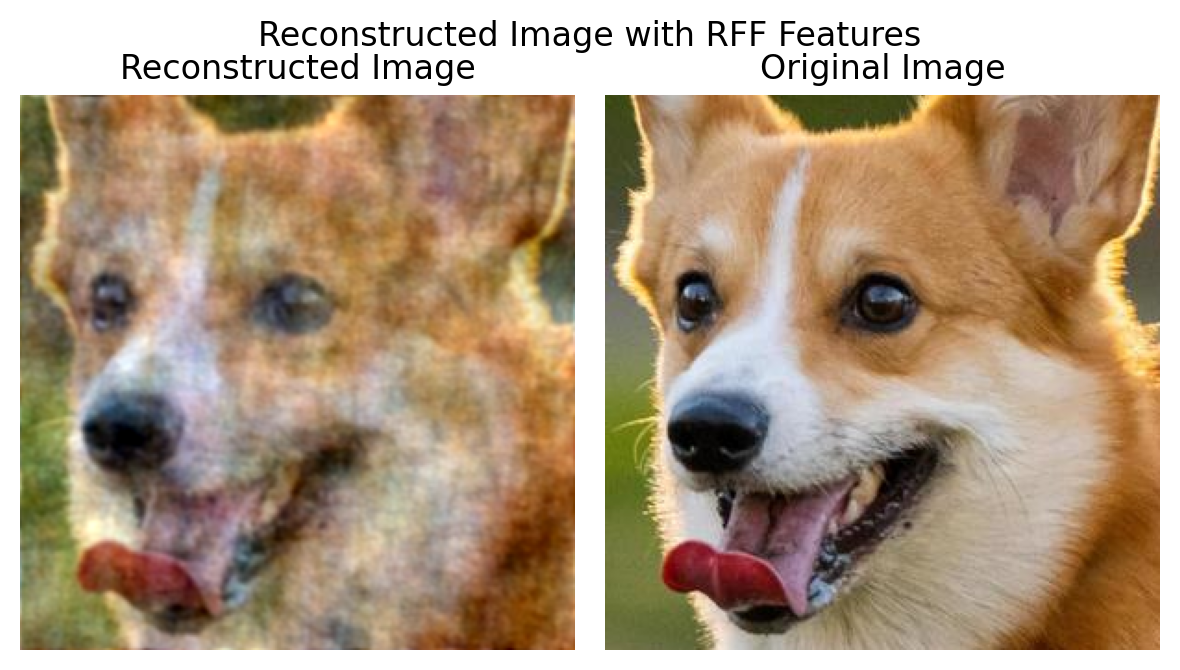

In [37]:
predicted_image = plot_reconstructed_and_original_image(crop, net, X_rff, title="Reconstructed Image with RFF Features")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


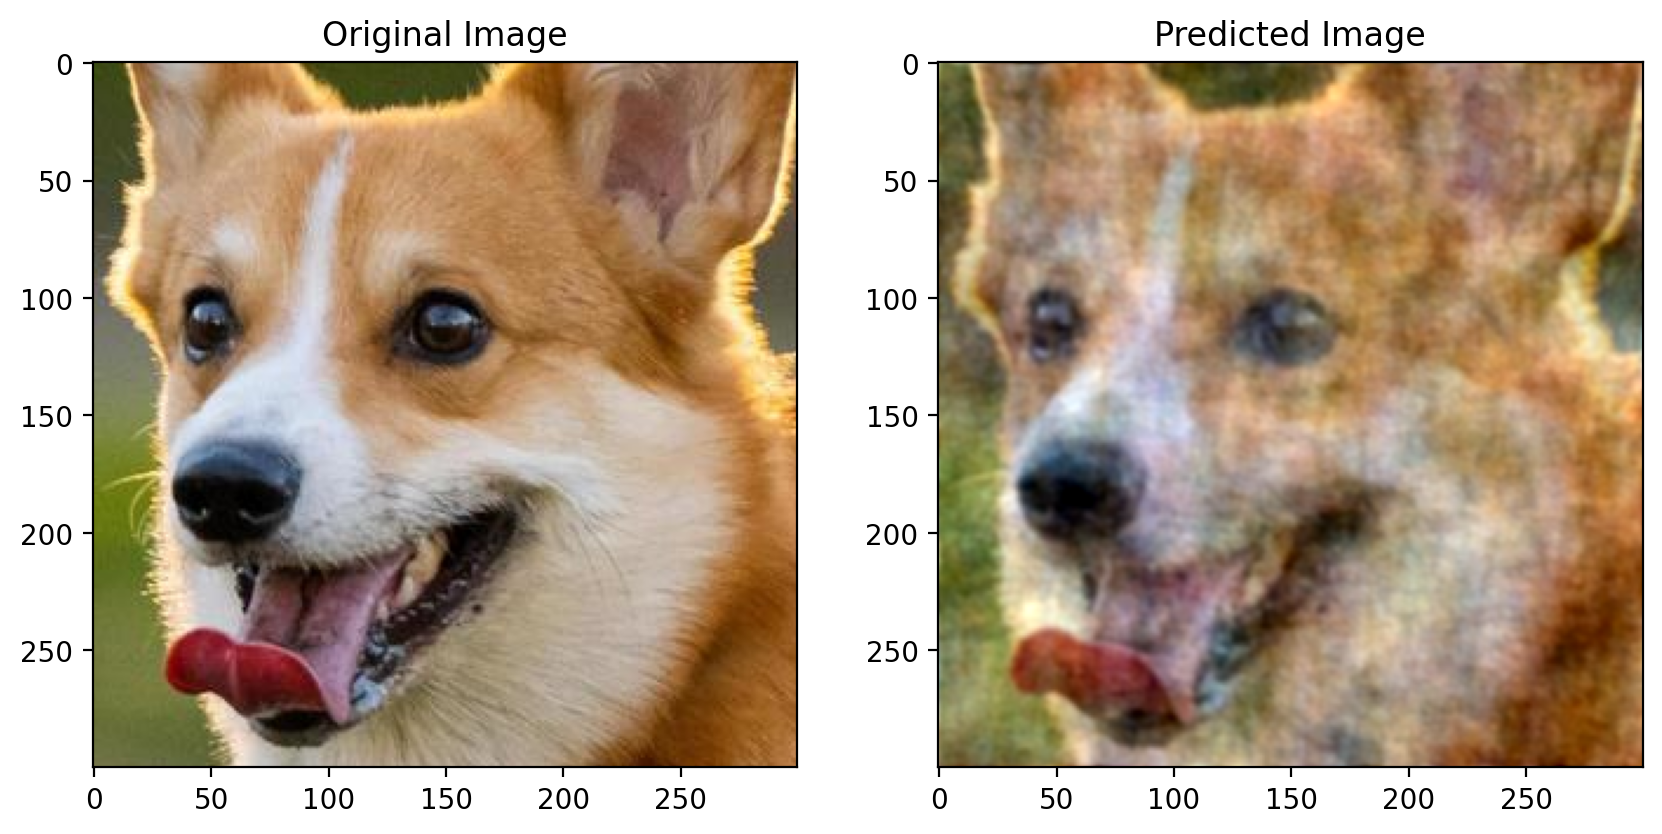

In [38]:
plt.figure(figsize=(10, 20))
plt.subplot(1, 2, 1)
plt.imshow(rearrange(crop, 'c h w -> h w c').float().cpu())  # Use 'cmap' based on your image type
plt.title('Original Image')

# Plotting the 'after' image
plt.subplot(1, 2, 2)
plt.imshow(predicted_image.cpu())  # Use 'cmap' based on your image type
plt.title('Predicted Image')


# Display the side-by-side images
plt.show()

In [40]:
crop.shape, predicted_image.float().dtype

(torch.Size([3, 300, 300]), torch.float32)

In [41]:
rmse = np.sqrt(mean_squared_error(rearrange(crop, 'c h w -> h w c').cpu().numpy(), predicted_image.numpy()))
print("RMSE =", rmse,"\n")

RMSE = 0.10347189246807909 



In [42]:
psnr = peak_signal_noise_ratio(rearrange(crop, 'c h w -> h w c').cpu().numpy(), predicted_image.numpy())
print("PSNR =", psnr,"\n")

PSNR = 19.703552154640917 

